In [1]:
%load_ext autoreload

In [2]:
import os
import sys

import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import kinectmatics as km

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

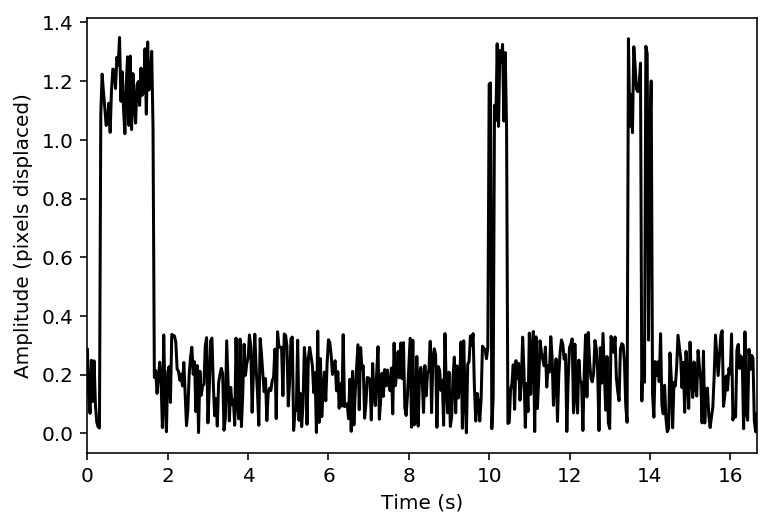

In [3]:
signal = np.zeros(501,)
signal[10:50] = 1
signal[300:302] = 1
signal[304:314] = 1

signal[404:414] = 1
signal[417:419] = 1
signal[420:422] = 1
signal += np.abs(np.random.random_sample(len(signal),))*0.35

Fs = 30.
t = np.arange(0, len(signal)/Fs, 1/Fs)

plt.plot(t, signal, 'k')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)');

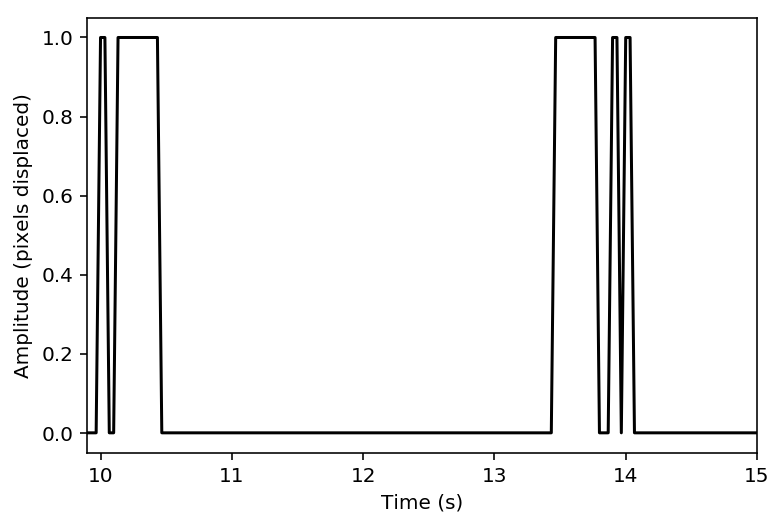

In [4]:
# filter yo' signal
signal_thresh = km.threshold_signal(signal, thresh = 0.35)

plt.plot(t, signal_thresh, 'k')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)')
plt.xlim(9.9, 15);

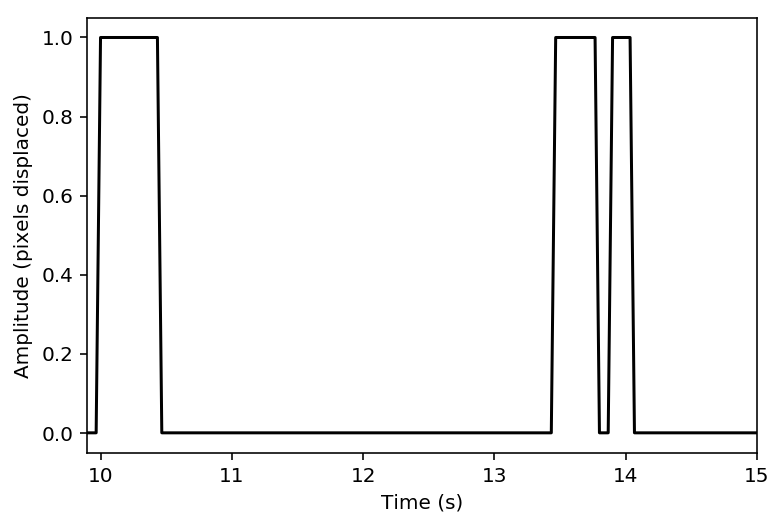

In [5]:
signal_merged = km.merge_neighboring_cells(signal_thresh, min_spacing=2)

plt.plot(t, signal_merged, 'k')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)')

plt.xlim(9.9, 15);

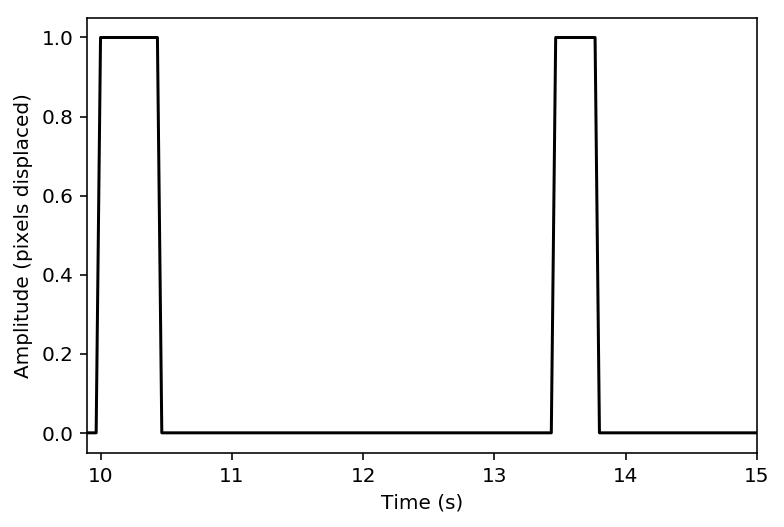

In [6]:
signal_merged_noisolated = km.filter_isolated_cells(signal_merged, struct=None, len_isolation=6)

plt.plot(t, signal_merged_noisolated, 'k')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)')

plt.xlim(9.9, 15);

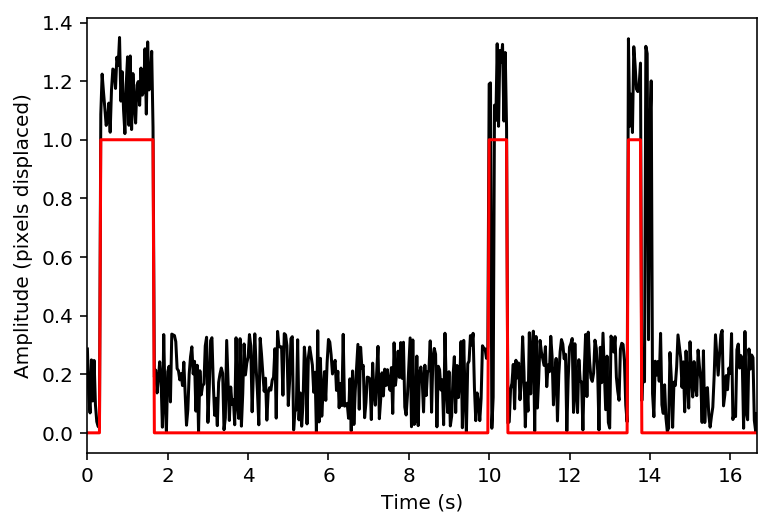

In [7]:
plt.plot(t, signal, 'k')
plt.plot(t, signal_merged_noisolated, 'r')
plt.xlim(t[0], t[-1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pixels displaced)');

In [8]:
events = km.array_to_sequence(signal_merged_noisolated)

In [9]:
print(events)

   duration  onset
0        40     10
1        14    300
2        10    404
